# Tic-Tac-Toe Endgame Data Set



### Dataset Information

Dataset encodes the complete set of possible board configurations at the end of tic-tac-toe games, where 'x' is assumed to have played first.

Target concept: "win for x" (i.e., true when 'x' has one of 8 possible ways to create a 'three-in-a-row')






**Attribute Information**

x = player x has taken, o = player o has taken, b = blank

Class: positive(1) when x wins, negative(0) when x loses

1. top-left-square: {x,o,b}
2. top-middle-square: {x,o,b}
3. top-right-square: {x,o,b}
4. middle-left-square: {x,o,b}
5. middle-middle-square: {x,o,b}
6. middle-right-square: {x,o,b}
7. bottom-left-square: {x,o,b}
8. bottom-middle-square: {x,o,b}
9. bottom-right-square: {x,o,b}
10. Class: {positive,negative}


---




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import itertools

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc, log_loss
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('tic-tac-toe.data')
df.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [3]:
df.shape
df.info()
df.isnull().sum().sort_values(ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   x         957 non-null    object
 1   x.1       957 non-null    object
 2   x.2       957 non-null    object
 3   x.3       957 non-null    object
 4   o         957 non-null    object
 5   o.1       957 non-null    object
 6   x.4       957 non-null    object
 7   o.2       957 non-null    object
 8   o.3       957 non-null    object
 9   positive  957 non-null    object
dtypes: object(10)
memory usage: 74.9+ KB


x           0
x.1         0
x.2         0
x.3         0
o           0
o.1         0
x.4         0
o.2         0
o.3         0
positive    0
dtype: int64

In [4]:
#rename columns
df.rename(columns={'x': 'TLS',
                   'x.1':'TMS',
                   'x.2':'TRS',
                   'x.3':'MLS',
                   'o':'MMS',
                   'o.1':'MRS', 
                   'x.4':'BLS',
                   'o.2':'BMS',
                   'o.3':'BRS',
                   'positive': 'classes'}, inplace=True)
df.head()

,TLS,TMS,TRS,MLS,MMS,MRS,BLS,BMS,BRS,classes
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


After Encoding:

x = 2, o = 1, b = 0

Classes:

0 = negative, 1 = positive

In [5]:
#converting into numerical data
le = LabelEncoder()

df['TLS'] = le.fit_transform(df['TLS'])
df['TMS'] = le.fit_transform(df['TMS'])
df['TRS'] = le.fit_transform(df['TRS'])
df['MLS'] = le.fit_transform(df['MLS'])
df['MMS'] = le.fit_transform(df['MMS'])
df['MRS'] = le.fit_transform(df['MRS'])
df['BLS'] = le.fit_transform(df['BLS'])
df['BMS'] = le.fit_transform(df['BMS'])
df['BRS'] = le.fit_transform(df['BRS'])
df['classes'] = le.fit_transform(df['classes'])

df.head()

,TLS,TMS,TRS,MLS,MMS,MRS,BLS,BMS,BRS,classes
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   TLS      957 non-null    int64
 1   TMS      957 non-null    int64
 2   TRS      957 non-null    int64
 3   MLS      957 non-null    int64
 4   MMS      957 non-null    int64
 5   MRS      957 non-null    int64
 6   BLS      957 non-null    int64
 7   BMS      957 non-null    int64
 8   BRS      957 non-null    int64
 9   classes  957 non-null    int64
dtypes: int64(10)
memory usage: 74.9 KB


## EDA

In [7]:
df.corr()

,TLS,TMS,TRS,MLS,MMS,MRS,BLS,BMS,BRS,classes
TLS,1.000000,0.001462,-0.062541,0.001462,-0.094648,-0.154137,-0.062541,-0.154137,-0.026394,0.038364
TMS,0.001462,1.000000,0.001462,-0.103014,-0.048661,-0.101532,-0.155544,0.050799,-0.154006,-0.085069
TRS,-0.062541,0.001462,1.000000,-0.155544,-0.094648,0.002775,-0.027761,-0.154137,-0.061158,0.038364
MLS,0.001462,-0.103014,-0.155544,1.000000,-0.048661,0.050799,0.001462,-0.101532,-0.154006,-0.085069
MMS,-0.094648,-0.048661,-0.094648,-0.048661,1.000000,-0.049182,-0.094648,-0.049182,-0.095169,0.175968
MRS,-0.154137,-0.101532,0.002775,0.050799,-0.049182,1.000000,-0.154137,-0.101690,0.002548,-0.084065
BLS,-0.062541,-0.155544,-0.027761,0.001462,-0.094648,-0.154137,1.000000,0.002775,-0.061158,0.038364
BMS,-0.154137,0.050799,-0.154137,-0.101532,-0.049182,-0.101690,0.002775,1.000000,0.002548,-0.084065
BRS,-0.026394,-0.154006,-0.061158,-0.154006,-0.095169,0.002548,-0.061158,0.002548,1.000000,0.039328
classes,0.038364,-0.085069,0.038364,-0.085069,0.175968,-0.084065,0.038364,-0.084065,0.039328,1.000000


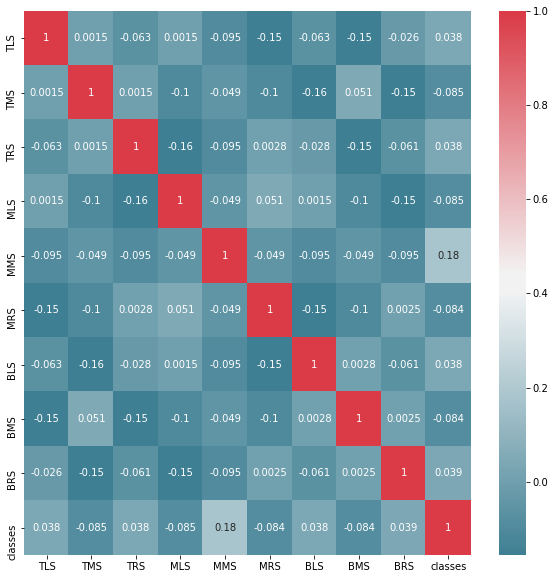

In [8]:
#correlation matrix
fig, ax = plt.subplots(figsize=(10,10))

cmap=sns.diverging_palette(220, 10, s=75, l=50, sep=10, n=6,
                          center='light', as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap, ax=ax)

Clearly a classification problem

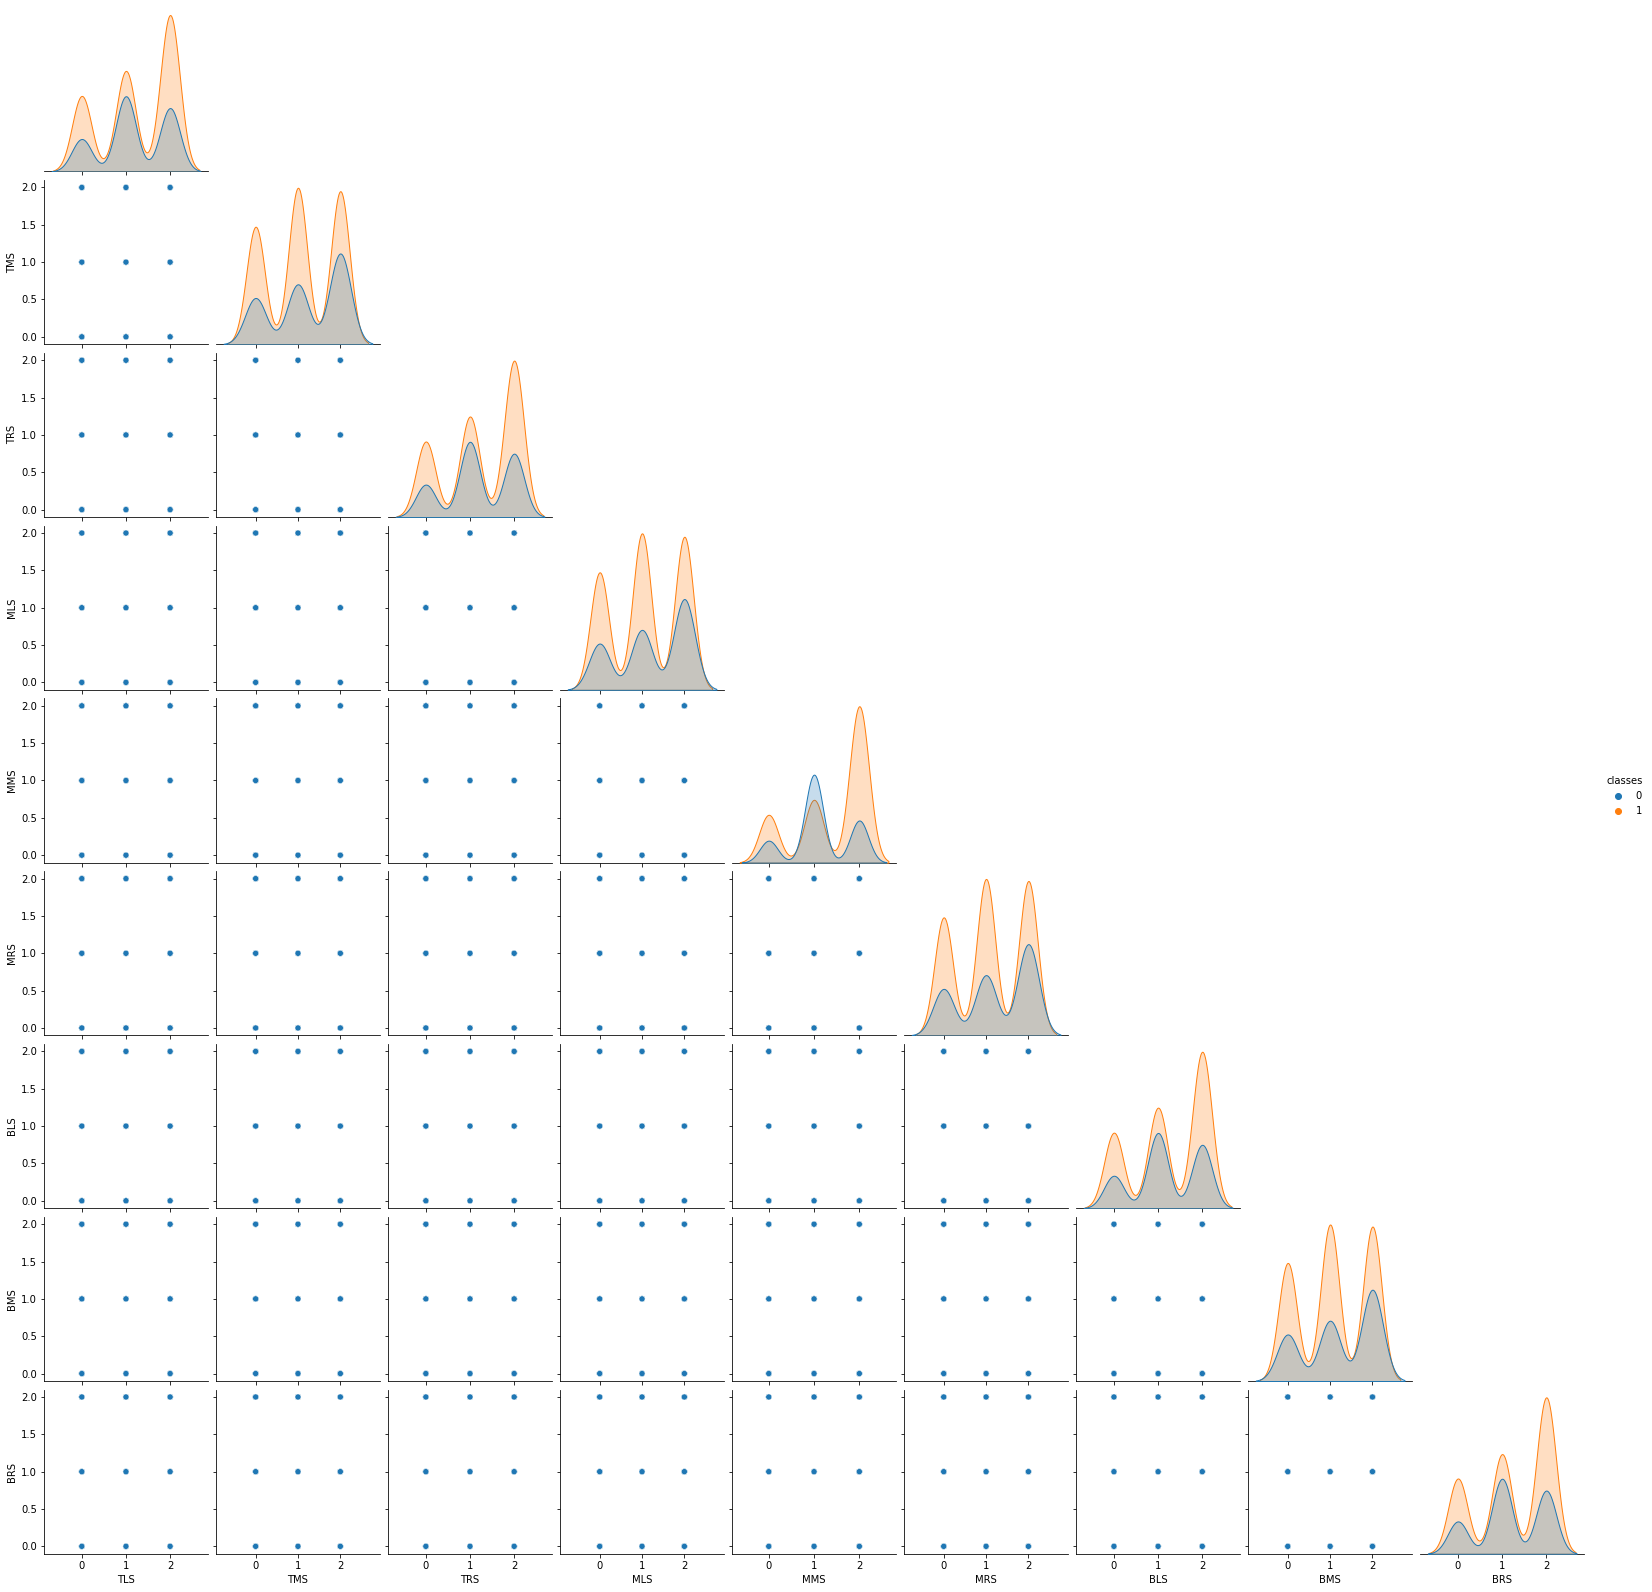

In [9]:
sns.pairplot(df, corner=True, hue='classes')
plt.show()

Text(0.5, 1.0, 'Bottom-Right Square')

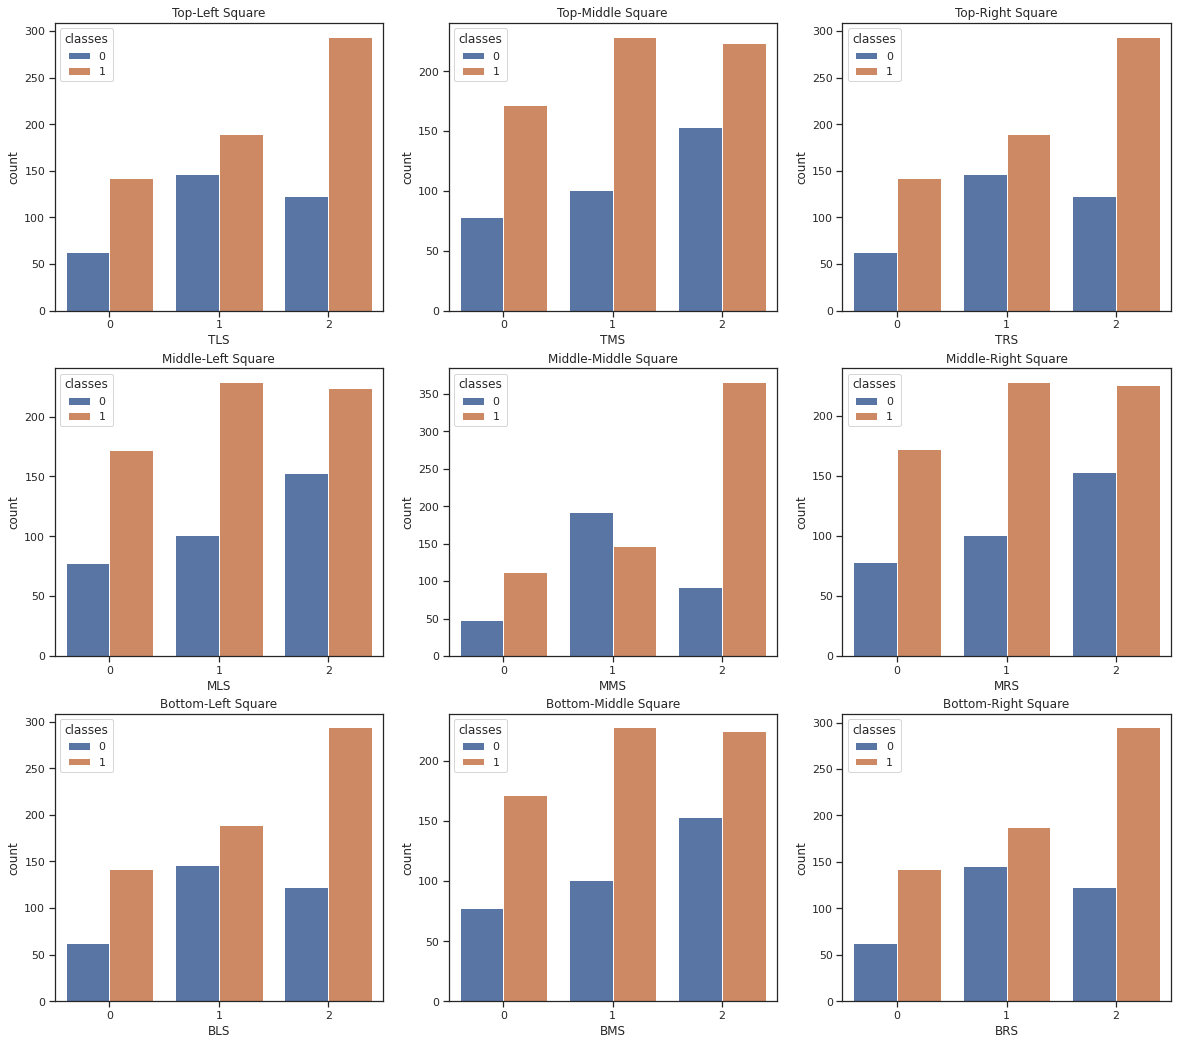

In [94]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

a0 = sns.countplot(data=df, x='TLS', hue='classes', ax=axes[0][0])
a0.set_title('Top-Left Square')
a1 = sns.countplot(data=df, x='TMS',hue='classes',ax=axes[0][1])
a1.set_title('Top-Middle Square')
a2 = sns.countplot(data=df, x='TRS',hue='classes',ax=axes[0][2])
a2.set_title('Top-Right Square')

a3 = sns.countplot(data=df, x='MLS',hue='classes',ax=axes[1][0])
a3.set_title('Middle-Left Square')
a4 = sns.countplot(data=df, x='MMS',hue='classes',ax=axes[1][1])
a4.set_title('Middle-Middle Square')
a5 = sns.countplot(data=df, x='MRS',hue='classes',ax=axes[1][2])
a5.set_title('Middle-Right Square')

a6 = sns.countplot(data=df, x='BLS',hue='classes',ax=axes[2][0])
a6.set_title('Bottom-Left Square')
a7 = sns.countplot(data=df, x='BMS',hue='classes',ax=axes[2][1])
a7.set_title('Bottom-Middle Square')
a8 = sns.countplot(data=df, x='BRS',hue='classes',ax=axes[2][2])
a8.set_title('Bottom-Right Square')

In [ ]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(19, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(data=df, orient='h', width=.6, palette="vlag")



## Classification

#### Creating training and testing dataset

In [57]:
x_features = ['TLS', 'TMS', 'TRS', 'MLS', 'MMS', 'MRS', 'BLS', 'BMS', 'BRS']
x = df[x_features]

x.head()

,TLS,TMS,TRS,MLS,MMS,MRS,BLS,BMS,BRS
0,2,2,2,2,1,1,1,2,1
1,2,2,2,2,1,1,1,1,2
2,2,2,2,2,1,1,1,0,0
3,2,2,2,2,1,1,0,1,0
4,2,2,2,2,1,1,0,0,1


In [58]:
y = df['classes']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classes, dtype: int64

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

print(x_train)

     TLS  TMS  TRS  MLS  MMS  MRS  BLS  BMS  BRS
107    2    2    0    1    2    1    0    1    2
938    0    0    1    2    0    1    2    2    1
534    0    1    2    1    2    2    2    0    1
236    2    0    2    0    2    1    1    1    2
339    1    2    1    0    2    0    2    2    1
..   ...  ...  ...  ...  ...  ...  ...  ...  ...
952    1    2    2    2    1    1    1    2    2
643    2    2    1    1    1    1    2    0    2
249    2    0    1    2    1    1    2    0    2
664    2    2    0    1    1    1    2    1    2
874    1    0    0    1    2    2    1    0    2

[669 rows x 9 columns]


### Creating training and testing dataset with fewer features

In [60]:
x1_features = ['TLS', 'TMS', 'TRS', 'MLS']
x1 = df[x1_features]

x1.head()

,TLS,TMS,TRS,MLS
0,2,2,2,2
1,2,2,2,2
2,2,2,2,2
3,2,2,2,2
4,2,2,2,2


In [61]:
y1 = df['classes']
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: classes, dtype: int64

In [62]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=3)

print(x1_train)

     TLS  TMS  TRS  MLS
107    2    2    0    1
938    0    0    1    2
534    0    1    2    1
236    2    0    2    0
339    1    2    1    0
..   ...  ...  ...  ...
952    1    2    2    2
643    2    2    1    1
249    2    0    1    2
664    2    2    0    1
874    1    0    0    1

[669 rows x 4 columns]


### Decision Tree Classifier

In [83]:
#Entropy Criterion

dtclf = DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
dtclf = dtclf.fit(x_train, y_train)
predictionTree = dtclf.predict(x_test)

In [67]:
#Entropy Criterion (for Information Gain)

dtclf1 = DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
dtclf1 = dtclf1.fit(x1_train, y1_train)
predictionTree1 = dtclf1.predict(x1_test)

In [16]:
print(predictionTree[0:5])
print(y_test[0:5])

[0 1 1 1 1]
632    0
554    1
549    1
290    1
206    1
Name: classes, dtype: int64


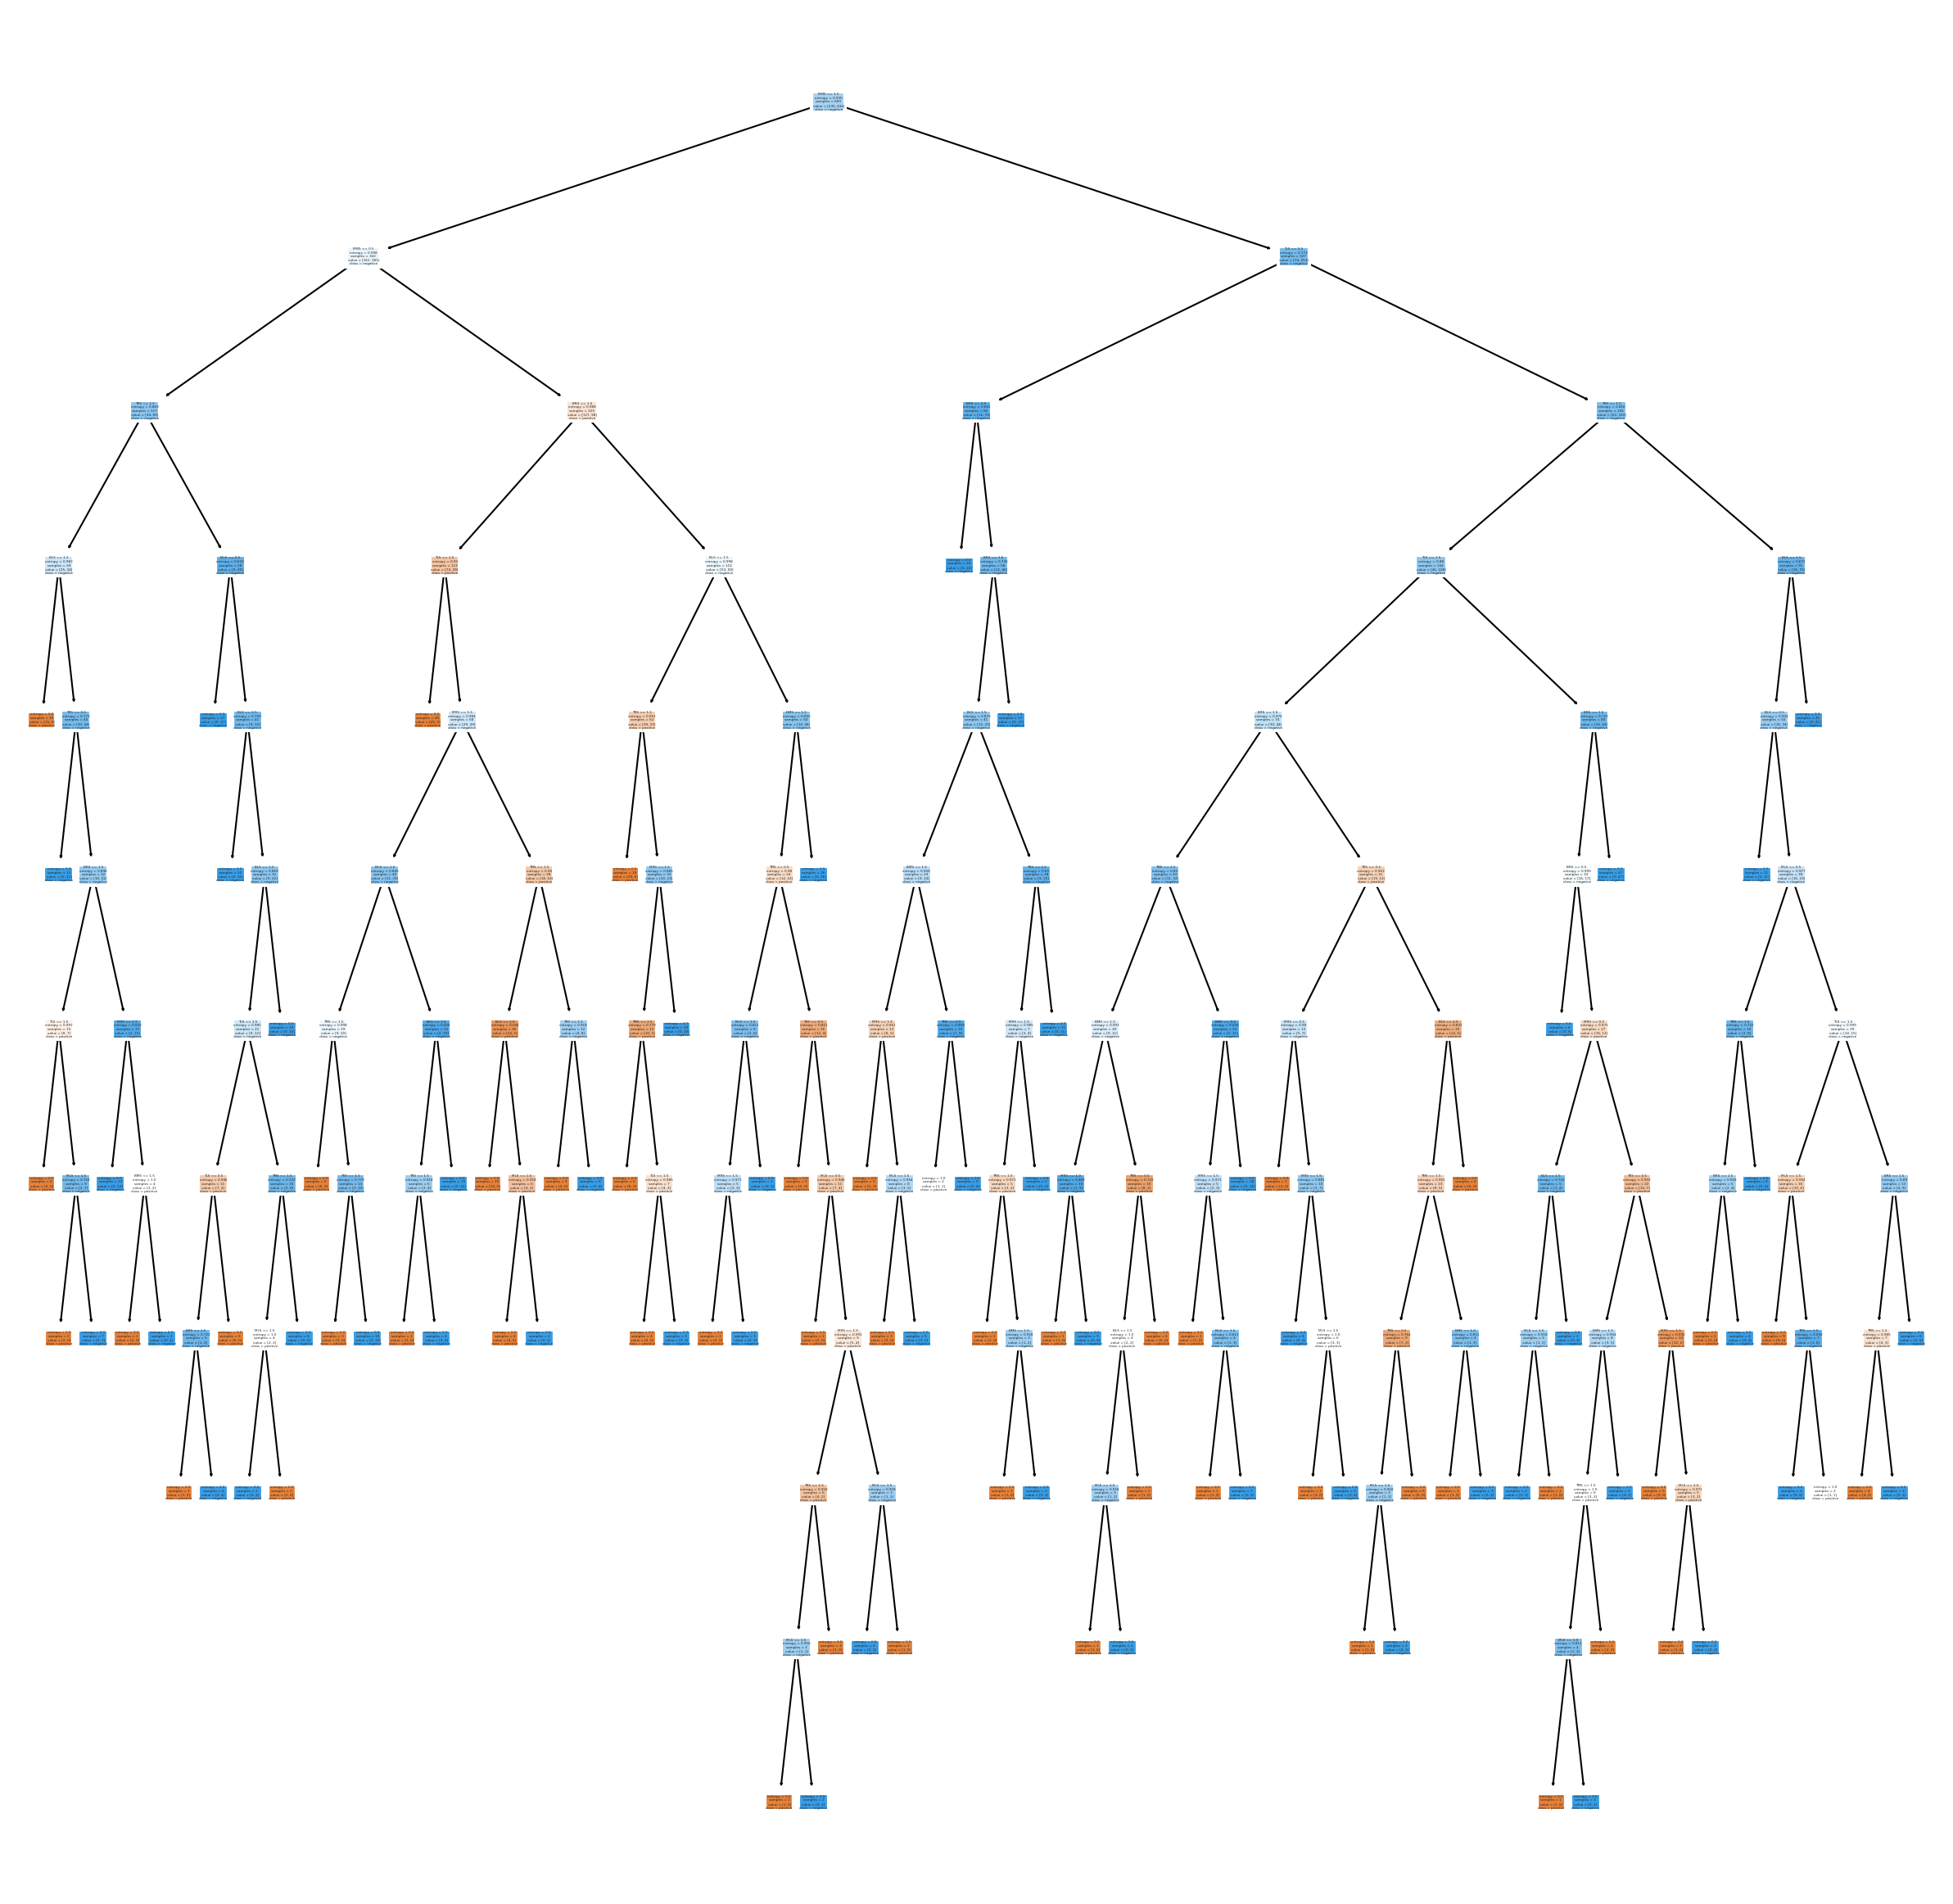

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(10,10), dpi=300)

y_names = ['positive', 'negative']
out = tree.plot_tree(dtclf, feature_names = x_features, class_names=y_names, filled=True)

for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(0.5)

In [45]:
#Gini Criterion (for Gini Impurity)

clf = DecisionTreeClassifier(criterion='gini', min_samples_split=3)
clf.fit(x_train, y_train)

pred = clf.predict(x_test)

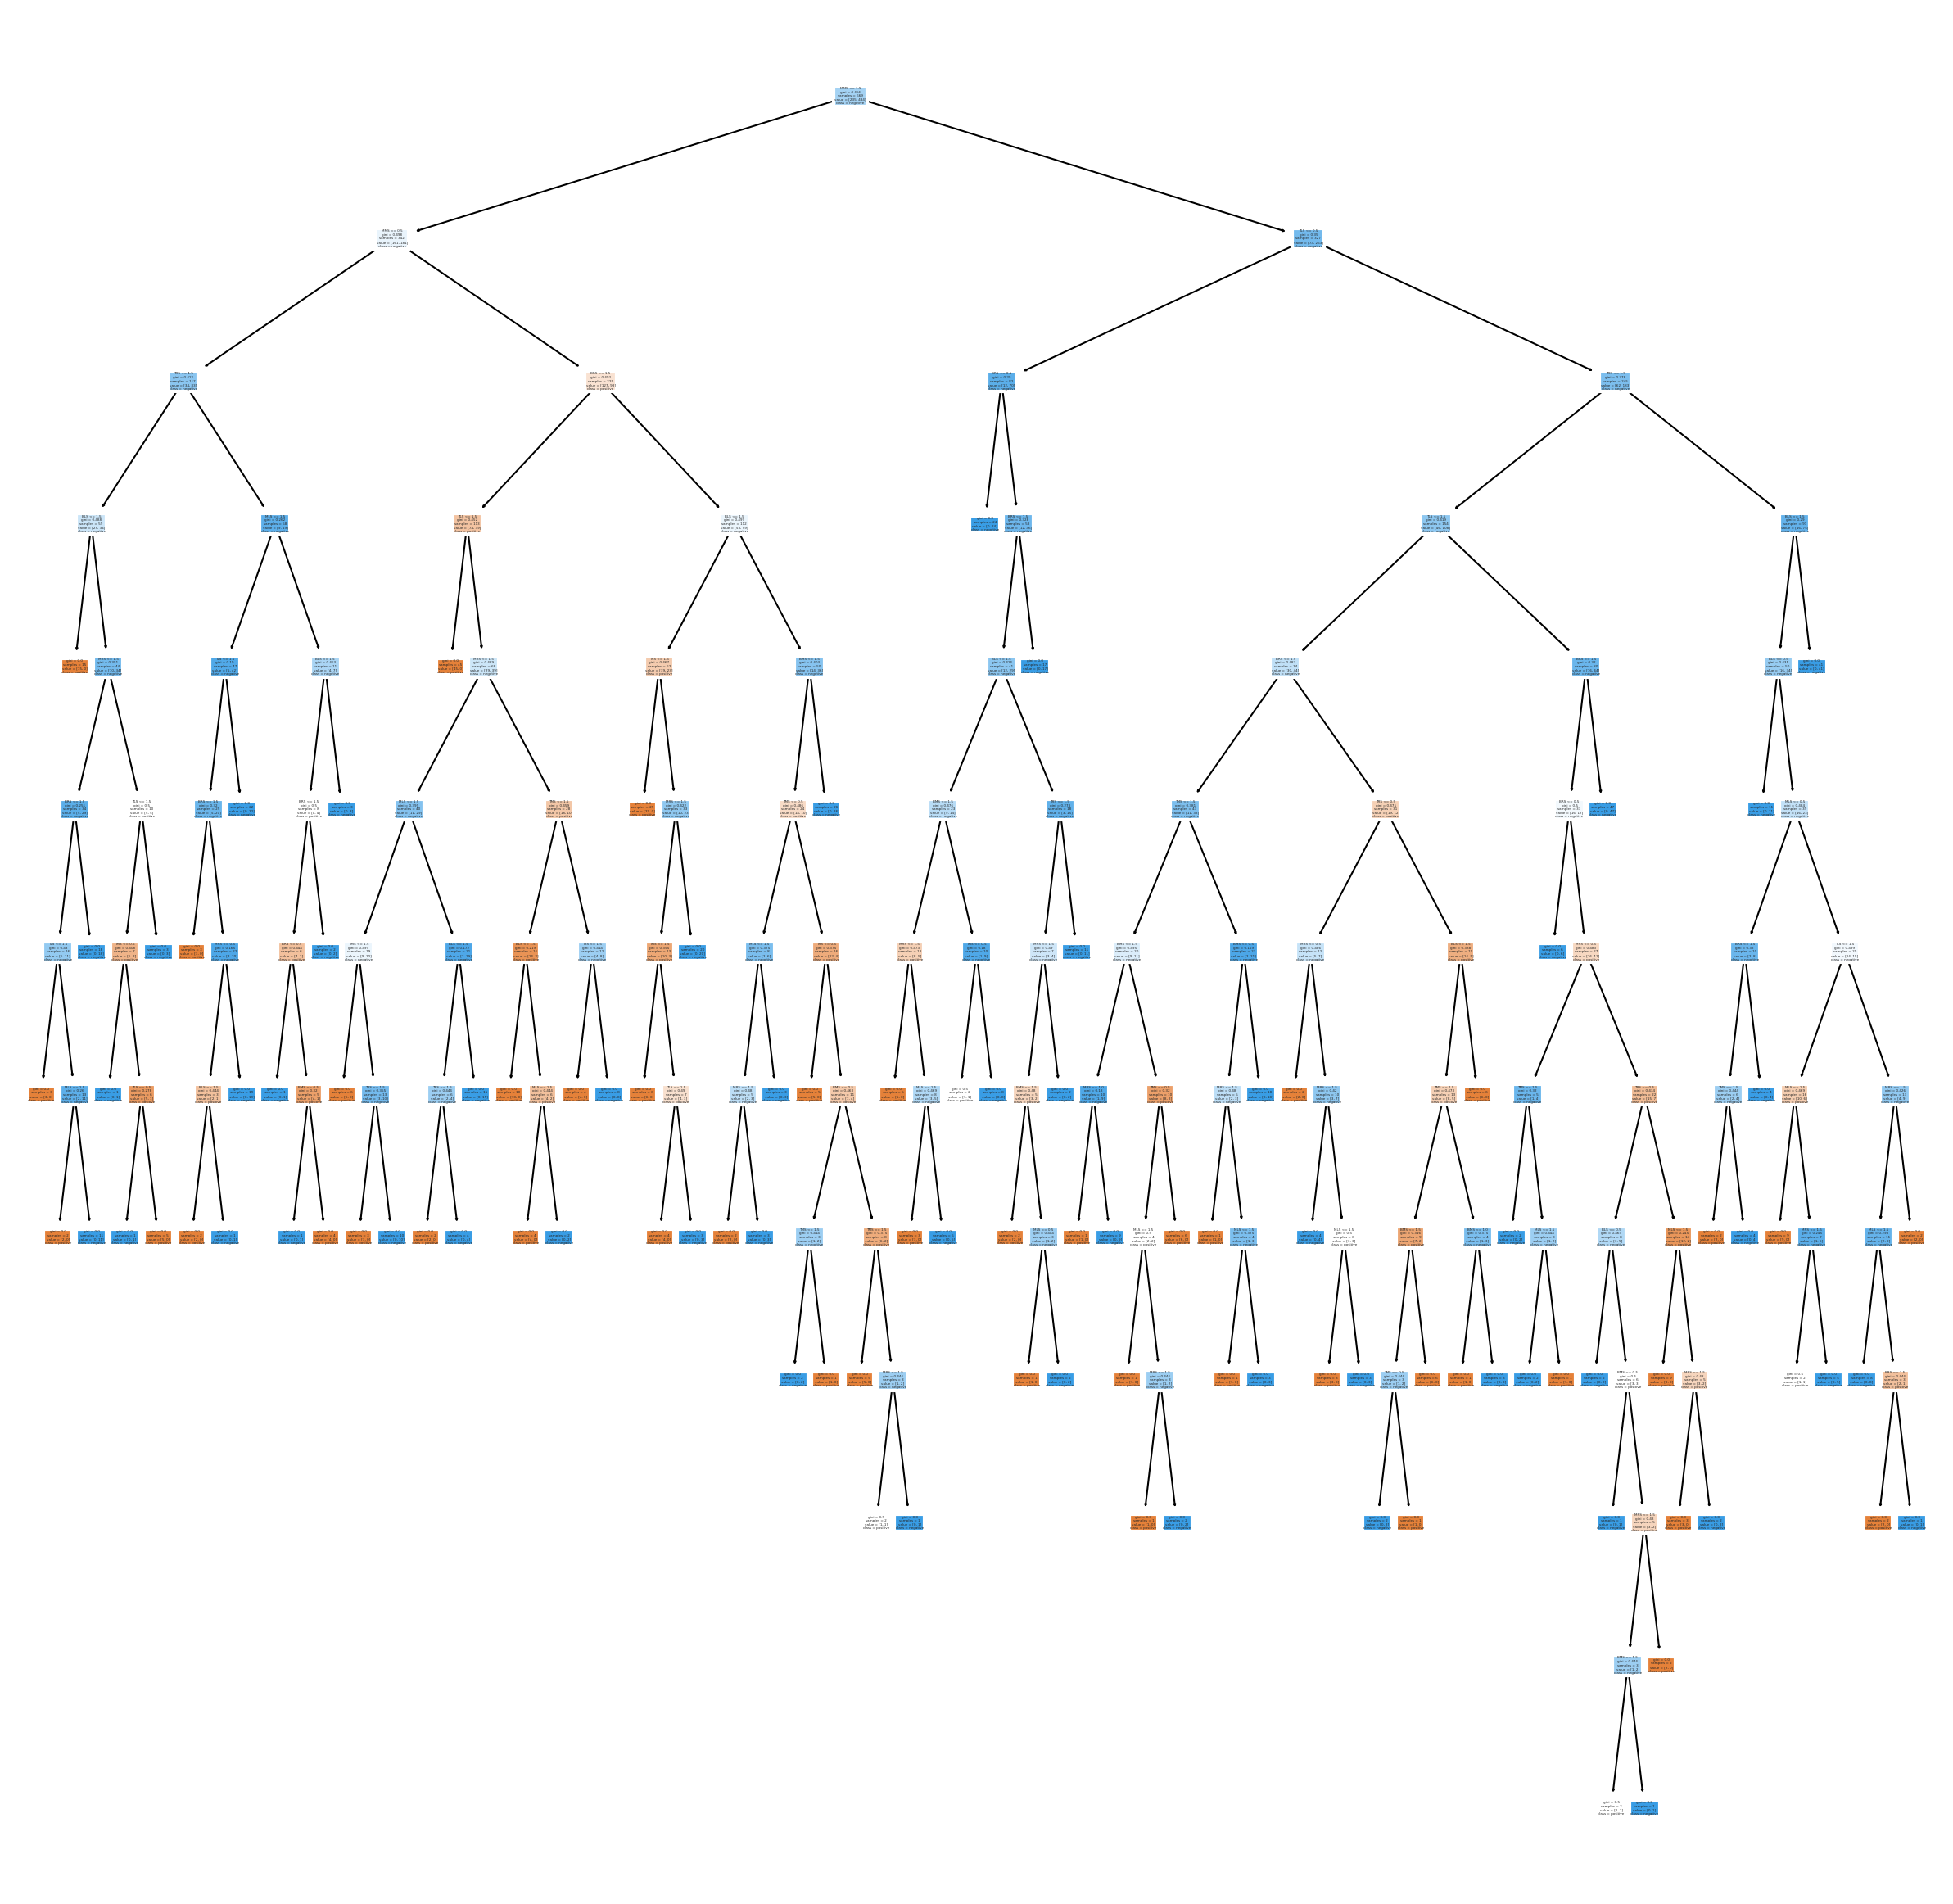

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(10,10), dpi=300)

y_names = ['positive', 'negative']
out = tree.plot_tree(clf, feature_names = x_features, class_names=y_names, filled=True)

for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(0.5)

Evaluation Metrics for Decision Trees:

In [85]:
#Classification report of Entropy:

print("Testing Report\n {}".format(classification_report(y_test, predictionTree)))
print("Testing accuracy: ", accuracy_score(y_test, predictionTree))

Testing Report
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        97
           1       0.95      0.93      0.94       191

    accuracy                           0.92       288
   macro avg       0.91      0.92      0.92       288
weighted avg       0.92      0.92      0.92       288

Testing accuracy:  0.9236111111111112


In [76]:
#Classification report of Entropy (fewer features):

print("Testing Report\n {}".format(classification_report(y1_test, predictionTree1)))
print("Testing accuracy: ", accuracy_score(y1_test, predictionTree1))

#Confusion Matrix
print(confusion_matrix(y1_test, predictionTree1))

Testing Report
               precision    recall  f1-score   support

           0       0.50      0.47      0.49        97
           1       0.74      0.76      0.75       191

    accuracy                           0.66       288
   macro avg       0.62      0.62      0.62       288
weighted avg       0.66      0.66      0.66       288

Testing accuracy:  0.6631944444444444
[[ 46  51]
 [ 46 145]]


In [17]:
# Accuracy of Entropy

dtclf_accuracy = metrics.accuracy_score(y_test, predictionTree)
print("Decision Tree Accuracy: ", dtclf_accuracy)

# finding the number of misclassified samples
misclassified_count = (y_test != predictionTree).sum()
print("Misclassified samples: ", misclassified_count)


Decision Tree Accuracy:  0.9236111111111112
Misclassified samples:  22


In [69]:
# Accuracy of Entropy (fewer features)

dtclf1_accuracy = metrics.accuracy_score(y1_test, predictionTree1)
print("Decision Tree Accuracy: ", dtclf1_accuracy)

# finding the number of misclassified samples
misclassified_count1 = (y1_test != predictionTree1).sum()
print("Misclassified samples: ", misclassified_count1)

Decision Tree Accuracy:  0.6631944444444444
Misclassified samples:  97


In [75]:
# Classification Report for Gini

print("Testing Report\n {}".format(classification_report(y_test, pred)))
print("Testing accuracy: ", accuracy_score(y_test, pred))

Testing Report
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        97
           1       0.94      0.92      0.93       191

    accuracy                           0.91       288
   macro avg       0.90      0.90      0.90       288
weighted avg       0.91      0.91      0.91       288

Testing accuracy:  0.9097222222222222


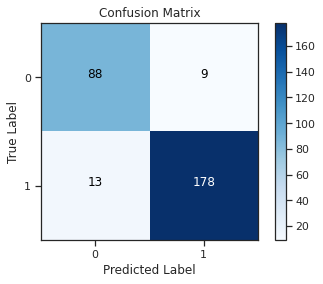

In [26]:
#Confusion Matrix for Entropy

def show_cm(y_test, predictionTree, class_names=None, model_name=None):

  cf = confusion_matrix(y_test, predictionTree)
  plt.imshow(cf, cmap=plt.cm.Blues)

  if model_name:
    plt.title("Confusion Matrix: {}".format(model_name))
  else:
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

  if class_names:
    tick_marks = np.arrange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
  else:
    class_names = set(y_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

  thresh = cf.max() / 2.0

  for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(j, i, cf[i, j], horizontalalignment="center", color="white" 
             if cf[i,j] > thresh else "black",)
    
  plt.colorbar()

show_cm(y_test, predictionTree)


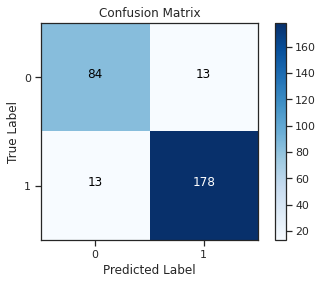

In [27]:
#Confusion Matrix for Gini

def show_cm(y_test, pred, class_names=None, model_name=None):

  cf = confusion_matrix(y_test, pred)
  plt.imshow(cf, cmap=plt.cm.Blues)

  if model_name:
    plt.title("Confusion Matrix: {}".format(model_name))
  else:
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

  if class_names:
    tick_marks = np.arrange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
  else:
    class_names = set(y_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

  thresh = cf.max() / 2.0

  for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(j, i, cf[i, j], horizontalalignment="center", color="white" 
             if cf[i,j] > thresh else "black",)
    
  plt.colorbar()

show_cm(y_test, pred)


In [20]:
#Accuracy of Gini

clf_accuracy = metrics.accuracy_score(y_test, pred)
print("Decision Tree Accuracy: ", clf_accuracy)

# finding the number of misclassified samples
misclassified_count = (y_test != pred).sum()
print("Misclassified samples: ", misclassified_count)


Decision Tree Accuracy:  0.9097222222222222
Misclassified samples:  26


In [22]:
#Defining AUC Score ROC Curve for Decision Tree

def get_auc_scores(clf, x_train, x_test, y_train, y_test):
  y_train_score = clf.predict_proba(x_train)[:, 1]
  y_test_score = clf.predict_proba(x_test)[:, 1]

  auc_train = roc_auc_score(y_train, y_train_score)
  auc_test = roc_auc_score(y_test, y_test_score)

  print("Training AUC: ", auc_train)
  print("Testing AUC: ", auc_test)
  
  return y_test_score

def plot_roc_curve(y_test, y_test_score):
  fpr, tpr, _ = roc_curve(y_test, y_test_score)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
  plt.plot([0, 1], [0, 1], "k-")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic Curve")
  plt.legend(loc="lower right")
  plt.show()


Training AUC:  0.9999803902343367
Testing AUC:  0.890538133534841


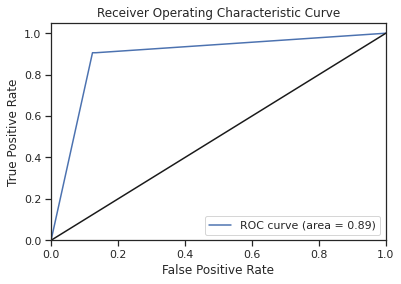

In [49]:
# ROC AUC for Entropy

plot_roc_curve(y_test, get_auc_scores(dtclf, x_train, x_test, y_train, y_test))

Training AUC:  0.8241347190901068
Testing AUC:  0.6688616613590976


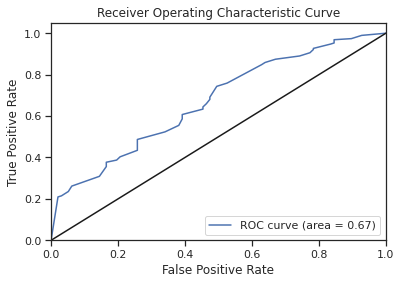

In [70]:
# ROC AUC for Entropy

plot_roc_curve(y1_test, get_auc_scores(dtclf1, x1_train, x1_test, y1_train, y1_test))

Training AUC:  0.9998774389646043
Testing AUC:  0.9024126949856965


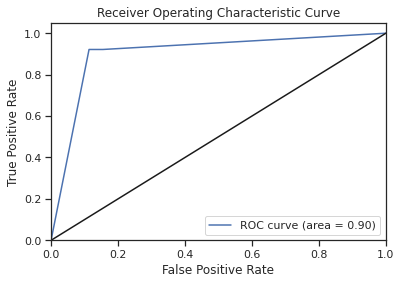

In [50]:
# ROC AUC for Gini

plot_roc_curve(y_test, get_auc_scores(clf, x_train, x_test, y_train, y_test))

In [104]:
#Cross validation for Entropy

#accuracy
cv_accuracy = cross_val_score(dtclf, x, y, cv=10)
print("Cross validation accuracy: ", cv_accuracy.mean())

#AUC
cv_auc = cross_val_score(dtclf, x, y, cv=10, scoring='roc_auc')
print("Cross validation AUC: ", cv_auc)

#Recall
cv_recall = cross_val_score(dtclf, x, y, cv=10, scoring='recall')
print("Cross validation recall: ", cv_recall)


Cross validation accuracy:  0.7849999999999999
Cross validation AUC:  [0.52236652 0.77489177 0.57070707 0.86483886 0.78306878 0.69165085
 0.73339658 0.81524927 0.91202346 0.86070381]
Cross validation recall:  [0.19047619 0.74603175 0.44444444 0.88888889 0.9047619  0.64516129
 0.90322581 0.83870968 0.85483871 0.96774194]


In [105]:
#Cross validation for Gini

#accuracy
cv_accuracy = cross_val_score(clf, x, y, cv=10)
print("Cross validation accuracy: ", cv_accuracy.mean())

#AUC
cv_auc = cross_val_score(clf, x, y, cv=10, scoring='roc_auc')
print("Cross validation AUC: ", cv_auc)

#Recall
cv_recall = cross_val_score(clf, x, y, cv=10, scoring='recall')
print("Cross validation recall: ", cv_recall)


Cross validation accuracy:  0.7788267543859649
Cross validation AUC:  [0.74867725 0.71284271 0.55555556 0.88720539 0.74242424 0.74905123
 0.84131879 0.84359726 0.90615836 0.89393939]
Cross validation recall:  [0.15873016 0.71428571 0.44444444 0.92063492 0.87301587 0.66129032
 0.9516129  0.87096774 0.90322581 1.        ]


### Random Forest

In [48]:
# Random Forest (Gini Criterion)

rfclf = RandomForestClassifier(n_estimators=300)
rfclf.fit(x_train, y_train)
predForest = rfclf.predict(x_test)


In [96]:
# Random Forest (Gini Criterion)

erfclf = RandomForestClassifier(criterion='entropy', n_estimators=300)
erfclf.fit(x_train, y_train)
predEForest = erfclf.predict(x_test)


Evaluation Metrics for Random Forest

In [86]:
# Classification Report for Random Forest (Gini)

print("Testing Report\n {}".format(classification_report(y_test, predForest)))
print("Testing Accuracy: ", accuracy_score(y_test, predForest))

Testing Report
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        97
           1       0.96      0.98      0.97       191

    accuracy                           0.96       288
   macro avg       0.96      0.95      0.96       288
weighted avg       0.96      0.96      0.96       288

Testing Accuracy:  0.9618055555555556


In [97]:
# Classification Report for Random Forest (Entropy)

print("Testing Report\n {}".format(classification_report(y_test, predEForest)))
print("Testing Accuracy: ", accuracy_score(y_test, predEForest))

Testing Report
               precision    recall  f1-score   support

           0       0.99      0.91      0.95        97
           1       0.95      0.99      0.97       191

    accuracy                           0.97       288
   macro avg       0.97      0.95      0.96       288
weighted avg       0.97      0.97      0.96       288

Testing Accuracy:  0.9652777777777778


In [87]:
# Accuracy of Random Forest (Gini)

rfclf_accuracy = metrics.accuracy_score(y_test, predForest)
print("Decision Tree Accuracy: ", rfclf_accuracy)

# finding the number of misclassified samples
misclassified_count = (y_test != predForest).sum()
print("Misclassified samples: ", misclassified_count)


Decision Tree Accuracy:  0.9618055555555556
Misclassified samples:  11


In [98]:
# Accuracy of Random Forest (Entropy)

erfclf_accuracy = metrics.accuracy_score(y_test, predEForest)
print("Decision Tree Accuracy: ", erfclf_accuracy)

# finding the number of misclassified samples
misclassified_count = (y_test != predEForest).sum()
print("Misclassified samples: ", misclassified_count)


Decision Tree Accuracy:  0.9652777777777778
Misclassified samples:  10


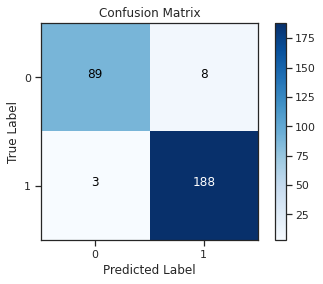

In [91]:
#Confusion Matrix for Random Forest (Gini)

def show_cm(y_test, predForest, class_names=None, model_name=None):

  cf = confusion_matrix(y_test, predForest)
  plt.imshow(cf, cmap=plt.cm.Blues)

  if model_name:
    plt.title("Confusion Matrix: {}".format(model_name))
  else:
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

  if class_names:
    tick_marks = np.arrange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
  else:
    class_names = set(y_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

  thresh = cf.max() / 2.0

  for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(j, i, cf[i, j], horizontalalignment="center", color="white" 
             if cf[i,j] > thresh else "black",)
    
  plt.colorbar()

show_cm(y_test, predForest)


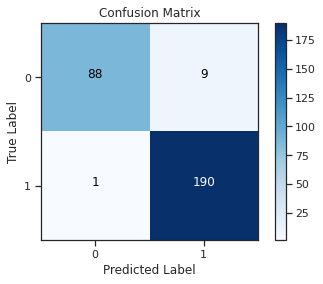

In [99]:
#Confusion Matrix for Random Forest (Entropy)

def show_cm(y_test, predEForest, class_names=None, model_name=None):

  cf = confusion_matrix(y_test, predEForest)
  plt.imshow(cf, cmap=plt.cm.Blues)

  if model_name:
    plt.title("Confusion Matrix: {}".format(model_name))
  else:
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

  if class_names:
    tick_marks = np.arrange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
  else:
    class_names = set(y_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

  thresh = cf.max() / 2.0

  for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(j, i, cf[i, j], horizontalalignment="center", color="white" 
             if cf[i,j] > thresh else "black",)
    
  plt.colorbar()

show_cm(y_test, predEForest)


In [106]:
#Cross validation for Random Forest (Gini)

#accuracy
cv_accuracy = cross_val_score(rfclf, x, y, cv=10)
print("Cross validation accuracy: ", cv_accuracy.mean())

#AUC
cv_auc = cross_val_score(rfclf, x, y, cv=10, scoring='roc_auc')
print("Cross validation AUC: ", cv_auc)

#Recall
cv_recall = cross_val_score(rfclf, x, y, cv=10, scoring='recall')
print("Cross validation recall: ", cv_recall)


Cross validation accuracy:  0.8727741228070176
Cross validation AUC:  [0.79341029 0.87686388 0.94973545 0.98436748 0.99422799 0.94805503
 0.98648008 0.99853372 1.         1.        ]
Cross validation recall:  [0.53968254 0.74603175 0.95238095 1.         1.         0.90322581
 1.         1.         1.         1.        ]


In [107]:
#Cross validation for Random Forest (Entropy)

#accuracy
cv_accuracy = cross_val_score(erfclf, x, y, cv=10)
print("Cross validation accuracy: ", cv_accuracy.mean())

#AUC
cv_auc = cross_val_score(erfclf, x, y, cv=10, scoring='roc_auc')
print("Cross validation AUC: ", cv_auc)

#Recall
cv_recall = cross_val_score(erfclf, x, y, cv=10, scoring='recall')
print("Cross validation recall: ", cv_recall)


Cross validation accuracy:  0.8748026315789474
Cross validation AUC:  [0.81649832 0.88985089 0.94179894 0.98075998 0.99134199 0.95564516
 0.97248577 0.99902248 1.         1.        ]
Cross validation recall:  [0.58730159 0.73015873 0.96825397 1.         1.         0.88709677
 1.         1.         1.         1.        ]


In [89]:
#ROC Curve for Random Forest

def get_auc_scores(rfclf, x_train, x_test, y_train, y_test):
  y_train_score = rfclf.predict_proba(x_train)[:, 1]
  y_test_score = rfclf.predict_proba(x_test)[:, 1]

  auc_train = roc_auc_score(y_train, y_train_score)
  auc_test = roc_auc_score(y_test, y_test_score)

  print("Training AUC: ", auc_train)
  print("Testing AUC: ", auc_test)
  
  return y_test_score

def plot_roc_curve(y_test, y_test_score):
  fpr, tpr, _ = roc_curve(y_test, y_test_score)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
  plt.plot([0, 1], [0, 1], "k-")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic Curve")
  plt.legend(loc="lower right")
  plt.show()


Training AUC:  1.0
Testing AUC:  0.9965455821233875


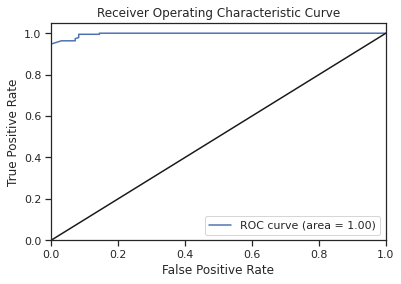

In [90]:
# ROC Gini

plot_roc_curve(y_test, get_auc_scores(rfclf, x_train, x_test, y_train, y_test))

Training AUC:  1.0
Testing AUC:  0.9973012360338965


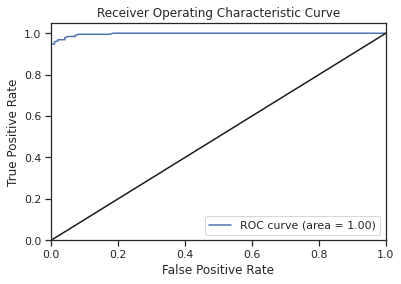

In [101]:
# ROC Entropy

plot_roc_curve(y_test, get_auc_scores(erfclf, x_train, x_test, y_train, y_test))

### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

Evaluation Metrics For KNN

In [35]:
# Confusion Matrix and Classification Report for KNN

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 60  37]
 [ 12 179]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        97
           1       0.83      0.94      0.88       191

    accuracy                           0.83       288
   macro avg       0.83      0.78      0.79       288
weighted avg       0.83      0.83      0.82       288



In [36]:
knn_accuracy = metrics.accuracy_score(y_test, y_pred)
print("KNN Accuracy: ", knn_accuracy)

# finding the number of misclassified samples
misclassified_count = (y_test != y_pred).sum()
print("Misclassified samples: ", misclassified_count)


KNN Accuracy:  0.8298611111111112
Misclassified samples:  49


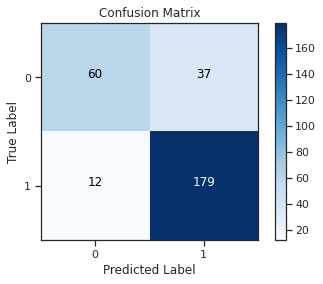

In [41]:
#Confusion Matrix for KNN

def show_cm(y_test, y_pred, class_names=None, model_name=None):

  cf = confusion_matrix(y_test, y_pred)
  plt.imshow(cf, cmap=plt.cm.Blues)

  if model_name:
    plt.title("Confusion Matrix: {}".format(model_name))
  else:
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

  if class_names:
    tick_marks = np.arrange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
  else:
    class_names = set(y_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

  thresh = cf.max() / 2.0

  for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(j, i, cf[i, j], horizontalalignment="center", color="white" 
             if cf[i,j] > thresh else "black",)
    
  plt.colorbar()

show_cm(y_test, y_pred)


In [37]:
#Calculating error

error = []

#calculating error for K values between 1 and 40
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

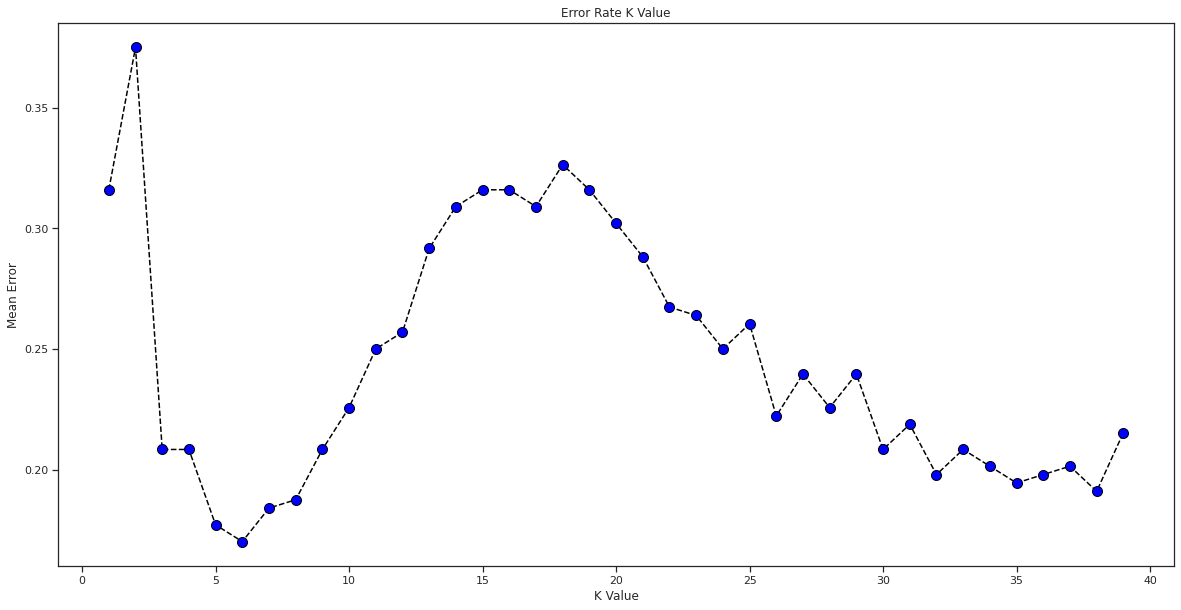

In [38]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [39]:
#ROC Curve for KNN

def get_auc_scores(classifier, x_train, x_test, y_train, y_test):
  y_train_score = classifier.predict_proba(x_train)[:, 1]
  y_test_score = classifier.predict_proba(x_test)[:, 1]

  auc_train = roc_auc_score(y_train, y_train_score)
  auc_test = roc_auc_score(y_test, y_test_score)

  print("Training AUC: ", auc_train)
  print("Testing AUC: ", auc_test)
  
  return y_test_score

def plot_roc_curve(y_test, y_test_score):
  fpr, tpr, _ = roc_curve(y_test, y_test_score)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
  plt.plot([0, 1], [0, 1], "k-")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic Curve")
  plt.legend(loc="lower right")
  plt.show()


Training AUC:  0.9384841651142269
Testing AUC:  0.8313542397581907


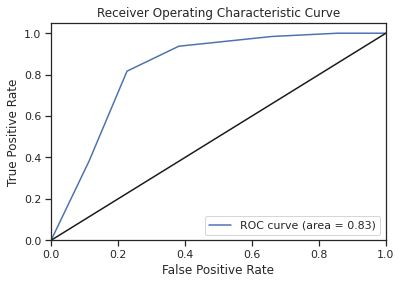

In [40]:
plot_roc_curve(y_test, get_auc_scores(classifier, x_train, x_test, y_train, y_test))

In [108]:
#Cross validation for KNN

#accuracy
cv_accuracy = cross_val_score(classifier, x, y, cv=10)
print("Cross validation accuracy: ", cv_accuracy.mean())

#AUC
cv_auc = cross_val_score(classifier, x, y, cv=10, scoring='roc_auc')
print("Cross validation AUC: ", cv_auc)

#Recall
cv_recall = cross_val_score(classifier, x, y, cv=10, scoring='recall')
print("Cross validation recall: ", cv_recall)


Cross validation accuracy:  0.8068201754385965
Cross validation AUC:  [0.66378066 0.78908129 0.72607023 0.8032708  0.8018278  0.84535104
 0.82542694 0.89247312 0.97702835 0.87829912]
Cross validation recall:  [0.6031746  0.79365079 0.88888889 0.95238095 0.87301587 0.82258065
 0.96774194 1.         0.98387097 0.87096774]


### Conclusion: 

From these 3 models, we can say that Random Forest gives the best prediction.